In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
train_df = pd.read_csv('train_combined_load_temp.csv', header=0)
test_df = pd.read_csv('test_combined_load_temp.csv', header=0)

In [3]:
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])

In [4]:
train_df.head()

date  HourlyDryBulbTemperature        mw  hour_of_day  \
0 2017-02-01 00:53:00                      37.0  1419.881            0   
1 2017-02-01 01:53:00                      37.0  1379.505            1   
2 2017-02-01 02:53:00                      36.0  1366.106            2   
3 2017-02-01 03:53:00                      36.0  1364.453            3   
4 2017-02-01 04:53:00                      36.0  1391.265            4   

   day_of_week  month  year  
0            2      2  2017  
1            2      2  2017  
2            2      2  2017  
3            2      2  2017  
4            2      2  2017

### standardize the values/add square of temp
- [When Do You Need to Standardize the Variables in a Regression Model?](https://statisticsbyjim.com/regression/standardize-variables-regression/)
- [Normalize columns of pandas data frame](https://stackoverflow.com/a/41532180/16868474)

In [5]:
train_df['temp_std'] = (train_df['HourlyDryBulbTemperature'] - train_df['HourlyDryBulbTemperature'].mean())/train_df['HourlyDryBulbTemperature'].std()
train_df['load_std'] = (train_df['mw'] - train_df['mw'].mean())/train_df['mw'].std()
train_df['temp_sqr'] = train_df['temp_std'].apply(lambda x: x * x)
train_df.head()

date  HourlyDryBulbTemperature        mw  hour_of_day  \
0 2017-02-01 00:53:00                      37.0  1419.881            0   
1 2017-02-01 01:53:00                      37.0  1379.505            1   
2 2017-02-01 02:53:00                      36.0  1366.106            2   
3 2017-02-01 03:53:00                      36.0  1364.453            3   
4 2017-02-01 04:53:00                      36.0  1391.265            4   

   day_of_week  month  year  temp_std  load_std  temp_sqr  
0            2      2  2017 -0.871499 -0.489452  0.759511  
1            2      2  2017 -0.871499 -0.630287  0.759511  
2            2      2  2017 -0.924494 -0.677024  0.854690  
3            2      2  2017 -0.924494 -0.682790  0.854690  
4            2      2  2017 -0.924494 -0.589267  0.854690

### one hot encode hour_of_day, day_of_week and month

In [6]:
one_hot_train_df = train_df.join(pd.get_dummies(train_df['hour_of_day'], prefix='hod'))
one_hot_train_df = one_hot_train_df.join(pd.get_dummies(train_df['day_of_week'], prefix='dow'))
one_hot_train_df = one_hot_train_df.join(pd.get_dummies(train_df['month'], prefix='mo'))
one_hot_train_df.head()

date  HourlyDryBulbTemperature        mw  hour_of_day  \
0 2017-02-01 00:53:00                      37.0  1419.881            0   
1 2017-02-01 01:53:00                      37.0  1379.505            1   
2 2017-02-01 02:53:00                      36.0  1366.106            2   
3 2017-02-01 03:53:00                      36.0  1364.453            3   
4 2017-02-01 04:53:00                      36.0  1391.265            4   

   day_of_week  month  year  temp_std  load_std  temp_sqr  ...  mo_3  mo_4  \
0            2      2  2017 -0.871499 -0.489452  0.759511  ...     0     0   
1            2      2  2017 -0.871499 -0.630287  0.759511  ...     0     0   
2            2      2  2017 -0.924494 -0.677024  0.854690  ...     0     0   
3            2      2  2017 -0.924494 -0.682790  0.854690  ...     0     0   
4            2      2  2017 -0.924494 -0.589267  0.854690  ...     0     0   

   mo_5  mo_6  mo_7  mo_8  mo_9  mo_10  mo_11  mo_12  
0     0     0     0     0     0      0      0      0  
1     0     0     0     0     0      0      0      0  
2     0     0     0     0     0      0      0      0  
3     0     0     0     0     0      0      0      0  
4     0     0     0     0     0      0      0      0  

[5 rows x 53 columns]

### Select the features required for the OLS model by column prefix
There are too many columns to choose by name

In [7]:
col_prefixes = ['temp_', 'hod_', 'dow_', 'mo_']

def is_one_of_col_prefixes(col_name, col_prefixes):
    starts_with_prefix = False
    for col_prefix in col_prefixes:
        if col_name.startswith(col_prefix):
            starts_with_prefix = True
            break
            
    return starts_with_prefix    

x_col_names = [index for index, value in one_hot_train_df.dtypes.items() if is_one_of_col_prefixes(index, col_prefixes)]
x_col_names

['temp_std',
 'temp_sqr',
 'hod_0',
 'hod_1',
 'hod_2',
 'hod_3',
 'hod_4',
 'hod_5',
 'hod_6',
 'hod_7',
 'hod_8',
 'hod_9',
 'hod_10',
 'hod_11',
 'hod_12',
 'hod_13',
 'hod_14',
 'hod_15',
 'hod_16',
 'hod_17',
 'hod_18',
 'hod_19',
 'hod_20',
 'hod_21',
 'hod_22',
 'hod_23',
 'dow_0',
 'dow_1',
 'dow_2',
 'dow_3',
 'dow_4',
 'dow_5',
 'dow_6',
 'mo_1',
 'mo_2',
 'mo_3',
 'mo_4',
 'mo_5',
 'mo_6',
 'mo_7',
 'mo_8',
 'mo_9',
 'mo_10',
 'mo_11',
 'mo_12']

### OLS model

In [8]:
import statsmodels.api as sm

train_X = train_df['temp_std']
train_Y = train_df['load_std']

model = sm.OLS(train_Y, train_X).fit()
# predictions = model.predict(train_X)

train_df['yhat'] = model.fittedvalues
train_df['resid'] = model.resid

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:               load_std   R-squared (uncentered):                   0.107
Model:                            OLS   Adj. R-squared (uncentered):              0.107
Method:                 Least Squares   F-statistic:                              3069.
Date:                Sat, 24 Dec 2022   Prob (F-statistic):                        0.00
Time:                        21:56:24   Log-Likelihood:                         -34785.
No. Observations:               25536   AIC:                                  6.957e+04
Df Residuals:                   25535   BIC:                                  6.958e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [17]:
train_XM = one_hot_train_df[x_col_names]
modelm = sm.OLS(train_Y, train_XM).fit()

one_hot_train_df['yhat'] = modelm.fittedvalues
one_hot_train_df['resid'] = modelm.resid

print_model = modelm.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               load_std   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     3180.
Date:                Sat, 24 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:03:30   Log-Likelihood:                -12858.
No. Observations:               25536   AIC:                         2.580e+04
Df Residuals:                   25493   BIC:                         2.615e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
temp_std       0.4499      0.005     86.748      0.0

### Adjusted R-squared (0-1 range, higher is better)
Linear Model with hour of day, day of week, month of year, temperature, and temperature squared: `0.839`

Compared to the model with just temperature this seems really good.

### Scatter plot of energy/temperature for months of January/July

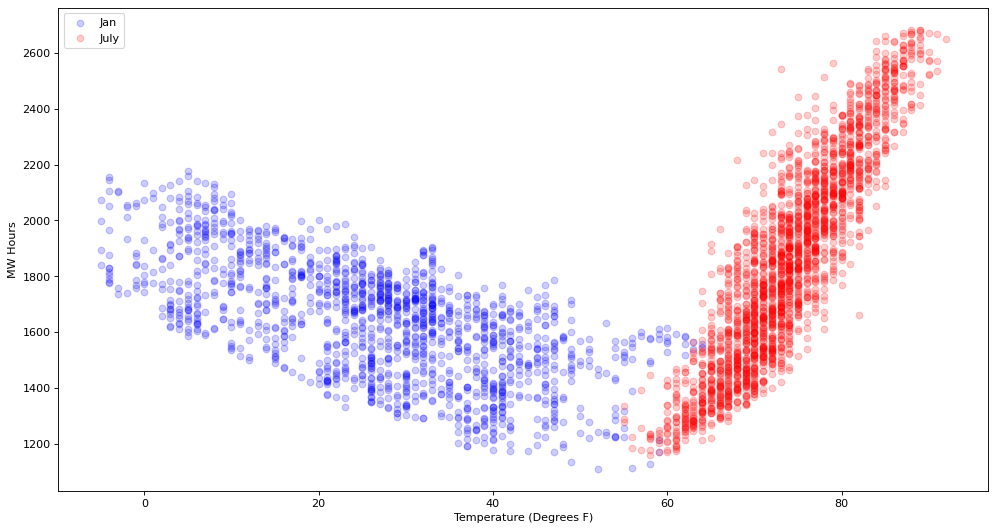

In [10]:
jan_train_df = train_df[train_df['month'] == 1]
jul_train_df = train_df[train_df['month'] == 7]

fig = plt.figure(figsize=(15, 8), dpi=80)
ax1 = fig.add_subplot(111)

ax1.scatter(jan_train_df['HourlyDryBulbTemperature'], jan_train_df['mw'], alpha = 0.2, c='b', label='Jan')
ax1.scatter(jul_train_df['HourlyDryBulbTemperature'], jul_train_df['mw'], alpha = 0.2, c='r', label='July')

plt.xlabel('Temperature (Degrees F)')
plt.ylabel('MW Hours')
plt.legend(loc='upper left');
fig.show()

### Scatterplot between energy and temperature, but only for the hours of midnight and noon

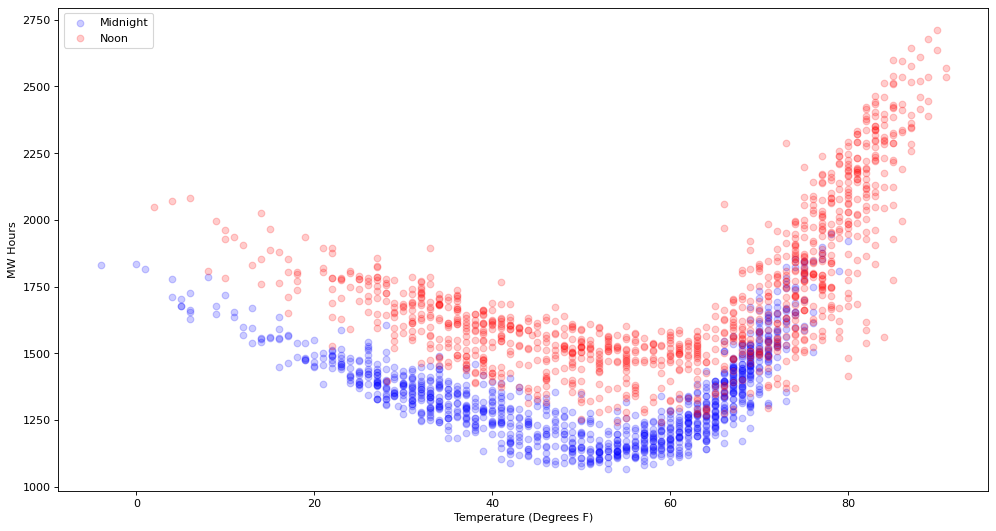

In [11]:
midnight_train_df = train_df[train_df['hour_of_day'] == 0]
noon_train_df = train_df[train_df['hour_of_day'] == 12]

fig = plt.figure(figsize=(15, 8), dpi=80)
ax1 = fig.add_subplot(111)

ax1.scatter(midnight_train_df['HourlyDryBulbTemperature'], midnight_train_df['mw'], alpha = 0.2, c='b', label='Midnight')
ax1.scatter(noon_train_df['HourlyDryBulbTemperature'], noon_train_df['mw'], alpha = 0.2, c='r', label='Noon')

plt.xlabel('Temperature (Degrees F)')
plt.ylabel('MW Hours')
plt.legend(loc='upper left');
fig.show()

### Add the `interaction` between hour of day, month of year and temperature

Remember that an `interaction` is just the *multiplication of two variables*. 
Luckily, using the formula approach of the `OLS.from_formula`function, we can easily add this into our models. 


If you wanted to build a linear regression with temperature, day of week, and the interaction between them 
(telling the model that the effect of temperature changes depending on the day of week), you could do the following:

```python    
    sm.OLS.from_formula('MW ~ Temp + C(day) + Temp*C(day)', data=train).fit().
```

In [12]:
temp_interaction_col_prefixes = ['hod_', 'mo_']

def add_temp_interaction_col(col_name):
    new_col_name, new_col_name_sqr = None, None
    
    for col_prefix in temp_interaction_col_prefixes:
        if col_name.startswith(col_prefix):
            new_col_name, new_col_name_sqr = f'inter_temp_std_{col_name}', f'inter_temp_sqr_{col_name}'
            one_hot_train_df[new_col_name] =  one_hot_train_df['temp_std'] * one_hot_train_df[col_name]
            one_hot_train_df[new_col_name_sqr] =  one_hot_train_df['temp_sqr'] * one_hot_train_df[col_name]
            break
            
    return new_col_name, new_col_name_sqr

In [13]:
interaction_cols = [add_temp_interaction_col(index) for index, value in one_hot_train_df.dtypes.items() if is_one_of_col_prefixes(index, temp_interaction_col_prefixes)]
interaction_cols

[('inter_temp_std_hod_0', 'inter_temp_sqr_hod_0'),
 ('inter_temp_std_hod_1', 'inter_temp_sqr_hod_1'),
 ('inter_temp_std_hod_2', 'inter_temp_sqr_hod_2'),
 ('inter_temp_std_hod_3', 'inter_temp_sqr_hod_3'),
 ('inter_temp_std_hod_4', 'inter_temp_sqr_hod_4'),
 ('inter_temp_std_hod_5', 'inter_temp_sqr_hod_5'),
 ('inter_temp_std_hod_6', 'inter_temp_sqr_hod_6'),
 ('inter_temp_std_hod_7', 'inter_temp_sqr_hod_7'),
 ('inter_temp_std_hod_8', 'inter_temp_sqr_hod_8'),
 ('inter_temp_std_hod_9', 'inter_temp_sqr_hod_9'),
 ('inter_temp_std_hod_10', 'inter_temp_sqr_hod_10'),
 ('inter_temp_std_hod_11', 'inter_temp_sqr_hod_11'),
 ('inter_temp_std_hod_12', 'inter_temp_sqr_hod_12'),
 ('inter_temp_std_hod_13', 'inter_temp_sqr_hod_13'),
 ('inter_temp_std_hod_14', 'inter_temp_sqr_hod_14'),
 ('inter_temp_std_hod_15', 'inter_temp_sqr_hod_15'),
 ('inter_temp_std_hod_16', 'inter_temp_sqr_hod_16'),
 ('inter_temp_std_hod_17', 'inter_temp_sqr_hod_17'),
 ('inter_temp_std_hod_18', 'inter_temp_sqr_hod_18'),
 ('inter_temp

In [14]:
one_hot_train_df.head()

date  HourlyDryBulbTemperature        mw  hour_of_day  \
0 2017-02-01 00:53:00                      37.0  1419.881            0   
1 2017-02-01 01:53:00                      37.0  1379.505            1   
2 2017-02-01 02:53:00                      36.0  1366.106            2   
3 2017-02-01 03:53:00                      36.0  1364.453            3   
4 2017-02-01 04:53:00                      36.0  1391.265            4   

   day_of_week  month  year  temp_std  load_std  temp_sqr  ...  \
0            2      2  2017 -0.871499 -0.489452  0.759511  ...   
1            2      2  2017 -0.871499 -0.630287  0.759511  ...   
2            2      2  2017 -0.924494 -0.677024  0.854690  ...   
3            2      2  2017 -0.924494 -0.682790  0.854690  ...   
4            2      2  2017 -0.924494 -0.589267  0.854690  ...   

   inter_temp_std_mo_8  inter_temp_sqr_mo_8  inter_temp_std_mo_9  \
0                 -0.0                  0.0                 -0.0   
1                 -0.0                  0.0                 -0.0   
2                 -0.0                  0.0                 -0.0   
3                 -0.0                  0.0                 -0.0   
4                 -0.0                  0.0                 -0.0   

   inter_temp_sqr_mo_9  inter_temp_std_mo_10  inter_temp_sqr_mo_10  \
0                  0.0                  -0.0                   0.0   
1                  0.0                  -0.0                   0.0   
2                  0.0                  -0.0                   0.0   
3                  0.0                  -0.0                   0.0   
4                  0.0                  -0.0                   0.0   

   inter_temp_std_mo_11  inter_temp_sqr_mo_11  inter_temp_std_mo_12  \
0                  -0.0                   0.0                  -0.0   
1                  -0.0                   0.0                  -0.0   
2                  -0.0                   0.0                  -0.0   
3                  -0.0                   0.0                  -0.0   
4                  -0.0                   0.0                  -0.0   

   inter_temp_sqr_mo_12  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 127 columns]

In [18]:
one_hot_train_df.dtypes

date                        datetime64[ns]
HourlyDryBulbTemperature           float64
mw                                 float64
hour_of_day                          int64
day_of_week                          int64
                                 ...      
inter_temp_sqr_mo_10               float64
inter_temp_std_mo_11               float64
inter_temp_sqr_mo_11               float64
inter_temp_std_mo_12               float64
inter_temp_sqr_mo_12               float64
Length: 127, dtype: object

In [16]:
inter_col_prefixes = ['temp_', 'hod_', 'dow_', 'mo_', 'inter_temp_std_', 'inter_temp_sqr_']

inter_col_names = [index for index, value in one_hot_train_df.dtypes.items() if is_one_of_col_prefixes(index, inter_col_prefixes)]
inter_col_names

['temp_std',
 'temp_sqr',
 'hod_0',
 'hod_1',
 'hod_2',
 'hod_3',
 'hod_4',
 'hod_5',
 'hod_6',
 'hod_7',
 'hod_8',
 'hod_9',
 'hod_10',
 'hod_11',
 'hod_12',
 'hod_13',
 'hod_14',
 'hod_15',
 'hod_16',
 'hod_17',
 'hod_18',
 'hod_19',
 'hod_20',
 'hod_21',
 'hod_22',
 'hod_23',
 'dow_0',
 'dow_1',
 'dow_2',
 'dow_3',
 'dow_4',
 'dow_5',
 'dow_6',
 'mo_1',
 'mo_2',
 'mo_3',
 'mo_4',
 'mo_5',
 'mo_6',
 'mo_7',
 'mo_8',
 'mo_9',
 'mo_10',
 'mo_11',
 'mo_12',
 'inter_temp_std_hod_0',
 'inter_temp_sqr_hod_0',
 'inter_temp_std_hod_1',
 'inter_temp_sqr_hod_1',
 'inter_temp_std_hod_2',
 'inter_temp_sqr_hod_2',
 'inter_temp_std_hod_3',
 'inter_temp_sqr_hod_3',
 'inter_temp_std_hod_4',
 'inter_temp_sqr_hod_4',
 'inter_temp_std_hod_5',
 'inter_temp_sqr_hod_5',
 'inter_temp_std_hod_6',
 'inter_temp_sqr_hod_6',
 'inter_temp_std_hod_7',
 'inter_temp_sqr_hod_7',
 'inter_temp_std_hod_8',
 'inter_temp_sqr_hod_8',
 'inter_temp_std_hod_9',
 'inter_temp_sqr_hod_9',
 'inter_temp_std_hod_10',
 'inter_temp_

In [19]:
train_XN = one_hot_train_df[inter_col_names]
model_inter = sm.OLS(train_Y, train_XN).fit()


one_hot_train_df['yhat_inter'] = model_inter.fittedvalues
one_hot_train_df['resid_inter'] = model_inter.resid

print_model = model_inter.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               load_std   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     2416.
Date:                Sat, 24 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:04:14   Log-Likelihood:                -5100.4
No. Observations:               25536   AIC:                         1.042e+04
Df Residuals:                   25425   BIC:                         1.133e+04
Df Model:                         110                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
temp_std                  0.02

### New adjusted $ R^2 $: 0.912

### Add columns for interaction between hour of day and day of week colums

In [20]:
def get_col_names_with_prefix(df, prefix):
    return [index for index, value in df.dtypes.items() if index.startswith(prefix) ]

def add_interaction_col(df, left_col_name, right_col_name):
    new_col_name = f'{left_col_name}_{right_col_name}'
    df[new_col_name] = df[left_col_name] * df[right_col_name]
    return new_col_name

hod_cols = get_col_names_with_prefix(one_hot_train_df, 'hod_')
dow_cols = get_col_names_with_prefix(one_hot_train_df, 'dow_')
hod_cols, dow_cols

(['hod_0',
  'hod_1',
  'hod_2',
  'hod_3',
  'hod_4',
  'hod_5',
  'hod_6',
  'hod_7',
  'hod_8',
  'hod_9',
  'hod_10',
  'hod_11',
  'hod_12',
  'hod_13',
  'hod_14',
  'hod_15',
  'hod_16',
  'hod_17',
  'hod_18',
  'hod_19',
  'hod_20',
  'hod_21',
  'hod_22',
  'hod_23'],
 ['dow_0', 'dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6'])

In [21]:
for hod_col in hod_cols:
    for dow_col in dow_cols:
        new_col = add_interaction_col(one_hot_train_df, hod_col, dow_col)
        print(new_col)


hod_0_dow_0
hod_0_dow_1
hod_0_dow_2
hod_0_dow_3
hod_0_dow_4
hod_0_dow_5
hod_0_dow_6
hod_1_dow_0
hod_1_dow_1
hod_1_dow_2
hod_1_dow_3
hod_1_dow_4
hod_1_dow_5
hod_1_dow_6
hod_2_dow_0
hod_2_dow_1
hod_2_dow_2
hod_2_dow_3
hod_2_dow_4
hod_2_dow_5
hod_2_dow_6
hod_3_dow_0
hod_3_dow_1
hod_3_dow_2
hod_3_dow_3
hod_3_dow_4
hod_3_dow_5
hod_3_dow_6
hod_4_dow_0
hod_4_dow_1
hod_4_dow_2
hod_4_dow_3
hod_4_dow_4
hod_4_dow_5
hod_4_dow_6
hod_5_dow_0
hod_5_dow_1
hod_5_dow_2
hod_5_dow_3
hod_5_dow_4
hod_5_dow_5
hod_5_dow_6
hod_6_dow_0
hod_6_dow_1
hod_6_dow_2
hod_6_dow_3
hod_6_dow_4
hod_6_dow_5
hod_6_dow_6
hod_7_dow_0
hod_7_dow_1
hod_7_dow_2
hod_7_dow_3
hod_7_dow_4
hod_7_dow_5
hod_7_dow_6
hod_8_dow_0
hod_8_dow_1
hod_8_dow_2
hod_8_dow_3
hod_8_dow_4
hod_8_dow_5
hod_8_dow_6
hod_9_dow_0
hod_9_dow_1
hod_9_dow_2
hod_9_dow_3
hod_9_dow_4
hod_9_dow_5
hod_9_dow_6
hod_10_dow_0
hod_10_dow_1
hod_10_dow_2
hod_10_dow_3
hod_10_dow_4
hod_10_dow_5
hod_10_dow_6
hod_11_dow_0
hod_11_dow_1
hod_11_dow_2
hod_11_dow_3
hod_11_dow_4
hod_

/tmp/ipykernel_45/959466605.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = df[left_col_name] * df[right_col_name]
/tmp/ipykernel_45/959466605.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = df[left_col_name] * df[right_col_name]
/tmp/ipykernel_45/959466605.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get 

In [22]:
inter_col_names = [index for index, value in one_hot_train_df.dtypes.items() if is_one_of_col_prefixes(index, inter_col_prefixes)]
len(inter_col_names)

285

In [23]:
train_XN2 = one_hot_train_df[inter_col_names]
model_inter2 = sm.OLS(train_Y, train_XN2).fit()

### Save the residuals from your final linear regression model on your training data set
one_hot_train_df['yhat_inter2'] = model_inter2.fittedvalues
one_hot_train_df['resid_inter2'] = model_inter2.resid

print_model = model_inter2.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               load_std   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     1248.
Date:                Sat, 24 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:05:42   Log-Likelihood:                -3247.2
No. Observations:               25536   AIC:                             6992.
Df Residuals:                   25287   BIC:                             9021.
Df Model:                         248                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
temp_std                  0.02

### New Adj. R-squared: 0.924

### Visualize your residuals across time in the training dataset

#### across the whole training set 

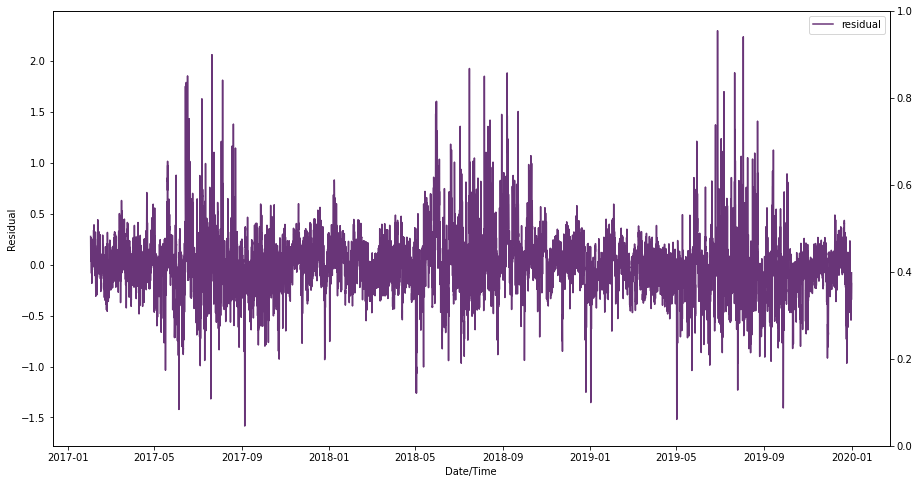

In [25]:
color1 = plt.cm.viridis(1)
color2 = plt.cm.viridis(0.5)

fig, host = plt.subplots(figsize=(15,8))
par = host.twinx()

host.set_xlabel("Date/Time")
host.set_ylabel("Residual")

p1, = host.plot(one_hot_train_df['date'], one_hot_train_df['resid_inter2'], color=color1, label="residual", alpha=0.8)
# p2, = par.plot(one_hot_test_df['date'], predictions_test_scaled, color=color2, label="prediction", alpha=0.5)

lns = [p1]
# lns = [p1, p2]

host.legend(handles=lns, loc='best')

### visualise for the first week of December 2019

In [41]:
one_hot_train_2019_Dec_df = one_hot_train_df[(one_hot_train_df['date'] >'2019-12-01') & (one_hot_train_df['date'] <= '2019-12-07')]
one_hot_train_2019_Dec_df.head()

date  HourlyDryBulbTemperature        mw  hour_of_day  \
24792 2019-12-01 00:53:00                      37.0  1261.968            0   
24793 2019-12-01 01:53:00                      37.0  1224.070            1   
24794 2019-12-01 02:53:00                      37.0  1209.697            2   
24795 2019-12-01 03:53:00                      38.0  1204.169            3   
24796 2019-12-01 04:53:00                      37.0  1203.950            4   

       day_of_week  month  year  temp_std  load_std  temp_sqr  ...  \
24792            6     12  2019 -0.871499 -1.040266  0.759511  ...   
24793            6     12  2019 -0.871499 -1.172458  0.759511  ...   
24794            6     12  2019 -0.871499 -1.222592  0.759511  ...   
24795            6     12  2019 -0.818504 -1.241874  0.669948  ...   
24796            6     12  2019 -0.871499 -1.242638  0.759511  ...   

       hod_22_dow_6  hod_23_dow_0  hod_23_dow_1  hod_23_dow_2  hod_23_dow_3  \
24792             0             0             0             0             0   
24793             0             0             0             0             0   
24794             0             0             0             0             0   
24795             0             0             0             0             0   
24796             0             0             0             0             0   

       hod_23_dow_4  hod_23_dow_5  hod_23_dow_6  yhat_inter2  resid_inter2  
24792             0             0             0    -0.917280     -0.122987  
24793             0             0             0    -1.002696     -0.169761  
24794             0             0             0    -1.073725     -0.148867  
24795             0             0             0    -1.129735     -0.112139  
24796             0             0             0    -1.095577     -0.147061  

[5 rows x 299 columns]

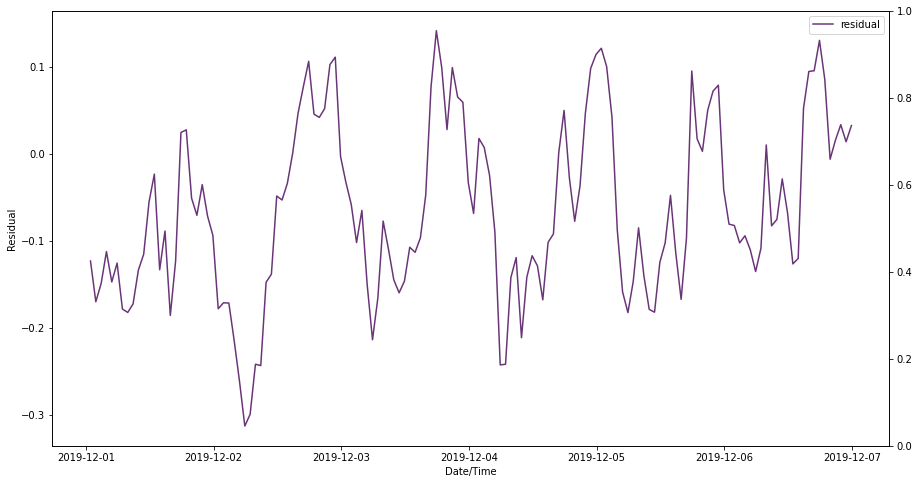

In [40]:
fig, host = plt.subplots(figsize=(15,8))
par = host.twinx()

host.set_xlabel("Date/Time")
host.set_ylabel("Residual")

p1, = host.plot(one_hot_train_2019_Dec_df['date'], one_hot_train_2019_Dec_df['resid_inter2'], color=color1, label="residual", alpha=0.8)
# p2, = par.plot(one_hot_test_df['date'], predictions_test_scaled, color=color2, label="prediction", alpha=0.5)

lns = [p1]
# lns = [p1, p2]

host.legend(handles=lns, loc='best')

Notice that there still appears to be a 24-hour “cycle” to your residuals

### Build an exponential smoothing model on the residuals

In [50]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_resid_es = ExponentialSmoothing(one_hot_train_df['resid_inter2'], trend=None, seasonal='add', seasonal_periods=24).fit()

one_hot_train_df['yhat_resid_es'] = model_resid_es.fittedvalues
one_hot_train_df['resid_es'] = model_resid_es.resid

print_model = model_resid_es.summary()
print(print_model)

                       ExponentialSmoothing Model Results                       
Dep. Variable:             resid_inter2   No. Observations:                25536
Model:             ExponentialSmoothing   SSE                            426.693
Optimized:                         True   AIC                        -104435.680
Trend:                             None   BIC                        -104223.836
Seasonal:                      Additive   AICC                       -104435.616
Seasonal Periods:                    24   Date:                 Sun, 25 Dec 2022
Box-Cox:                          False   Time:                         00:09:03
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8840738                alpha                 True
smoothing_seasonal       

### Predicted values of residuals on training dataset

In [55]:
preds_resid_es_train = model_resid_es.predict(start=0)
preds_resid_es_train

0        0.272200
1        0.277059
2        0.242691
3        0.191589
4        0.153024
           ...   
25531   -0.285780
25532   -0.337018
25533   -0.330343
25534   -0.282926
25535   -0.193220
Length: 25536, dtype: float64

### calculate the differene between predicted residual and the actual from last model

<AxesSubplot: >

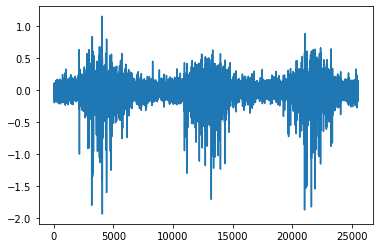

In [57]:
one_hot_train_df['resid_es_pred'] = model_resid_es.predict(start=0)
(one_hot_train_df['resid_es_pred'] - one_hot_train_df['resid_inter2']).plot()

### Add the predicted residuals to predictions of energy usage

In [60]:
one_hot_train_df['preds_with_resid_es_pred'] = model_inter2.predict(train_XN2) + one_hot_train_df['resid_es_pred']
one_hot_train_df['preds_with_resid_es_pred']

0       -0.494932
1       -0.591396
2       -0.619204
3       -0.639151
4       -0.514912
           ...   
25531    0.218186
25532    0.009249
25533   -0.208131
25534   -0.400320
25535   -0.597199
Name: preds_with_resid_es_pred, Length: 25536, dtype: float64

### Predictions from final linear regression model & MAPE

In [61]:
predictions = model_inter2.predict(train_XN2)

In [62]:
train_XN2.head()

temp_std  temp_sqr  hod_0  hod_1  hod_2  hod_3  hod_4  hod_5  hod_6  hod_7  \
0 -0.871499  0.759511      1      0      0      0      0      0      0      0   
1 -0.871499  0.759511      0      1      0      0      0      0      0      0   
2 -0.924494  0.854690      0      0      1      0      0      0      0      0   
3 -0.924494  0.854690      0      0      0      1      0      0      0      0   
4 -0.924494  0.854690      0      0      0      0      1      0      0      0   

   ...  hod_22_dow_4  hod_22_dow_5  hod_22_dow_6  hod_23_dow_0  hod_23_dow_1  \
0  ...             0             0             0             0             0   
1  ...             0             0             0             0             0   
2  ...             0             0             0             0             0   
3  ...             0             0             0             0             0   
4  ...             0             0             0             0             0   

   hod_23_dow_2  hod_23_dow_3  hod_23_dow_4  hod_23_dow_5  hod_23_dow_6  
0             0             0             0             0             0  
1             0             0             0             0             0  
2             0             0             0             0             0  
3             0             0             0             0             0  
4             0             0             0             0             0  

[5 rows x 285 columns]

In [63]:
predictions.head()

0   -0.767131
1   -0.868455
2   -0.861896
3   -0.830740
4   -0.667936
dtype: float64

In [66]:
# reversing this transformation which we did above
# `train_df['load_std'] = (train_df['mw'] - train_df['mw'].mean())/train_df['mw'].std()`
load_mean = train_df['mw'].mean()
load_std_dev = train_df['mw'].std()
load_mean, load_std_dev

(1560.2021741854637, 286.6902647599262)

In [67]:
pred_Y = (predictions * load_std_dev) + load_mean
pred_wresid_es_Y = (one_hot_train_df['preds_with_resid_es_pred'] * load_std_dev) + load_mean

In [68]:
pred_Y.head(), pred_wresid_es_Y.head(), one_hot_train_df['mw'].head(), 

(0    1340.273043
 1    1311.224494
 2    1313.105097
 3    1322.037175
 4    1368.711449
 dtype: float64,
 0    1418.310075
 1    1390.654557
 2    1382.682332
 3    1376.963821
 4    1412.581826
 Name: preds_with_resid_es_pred, dtype: float64,
 0    1419.881
 1    1379.505
 2    1366.106
 3    1364.453
 4    1391.265
 Name: mw, dtype: float64)

In [69]:
error_percent = (one_hot_train_df['mw'] - pred_Y) / one_hot_train_df['mw']
error_percent_wresid_es = (one_hot_train_df['mw'] - pred_wresid_es_Y) / one_hot_train_df['mw']
error_percent.head(), error_percent_wresid_es.head()

(0    0.056067
 1    0.049496
 2    0.038797
 3    0.031086
 4    0.016211
 dtype: float64,
 0    0.001106
 1   -0.008082
 2   -0.012134
 3   -0.009169
 4   -0.015322
 dtype: float64)

In [70]:
error_percent.apply(lambda x: abs(x) * 100).head(20)

0     5.606664
1     4.949638
2     3.879706
3     3.108632
4     1.621082
5     1.051376
6     0.664538
7     1.635781
8     2.294370
9     1.911770
10    1.334415
11    2.052729
12    1.780701
13    2.598134
14    2.384119
15    1.919335
16    2.425019
17    3.696994
18    4.212364
19    2.480358
dtype: float64

In [116]:
mape_fraction = error_percent.apply(lambda x: abs(x)).sum() / error_percent.count()
mape = mape_fraction * 100

mape_fraction_wresid_es = error_percent_wresid_es.apply(lambda x: abs(x)).sum() / error_percent_wresid_es.count()
mape_wresid_es = mape_fraction_wresid_es * 100

print(f"MAPE of training set on last model; model with residuals exponential smoothing: {mape}, {mape_wresid_es}")

MAPE of training set on last model; model with residuals exponential smoothing: 3.511954103205507, 1.4752680418381297


#### MAPE has significantly reduced compared to last model

### predictions on test data set

In [78]:
# standardize temp and add temperature squared column
test_df['temp_std'] = (test_df['HourlyDryBulbTemperature'] - train_df['HourlyDryBulbTemperature'].mean())/train_df['HourlyDryBulbTemperature'].std()
test_df['temp_sqr'] = test_df['temp_std'].apply(lambda x: x * x)

# one hot encode date
one_hot_test_df = test_df.join(pd.get_dummies(test_df['hour_of_day'], prefix='hod'))
one_hot_test_df = one_hot_test_df.join(pd.get_dummies(one_hot_test_df['day_of_week'], prefix='dow'))
one_hot_test_df = one_hot_test_df.join(pd.get_dummies(one_hot_test_df['month'], prefix='mo'))

one_hot_test_df.head()

date  HourlyDryBulbTemperature        mw  hour_of_day  \
0 2020-01-01 00:53:00                      31.0  1363.428            0   
1 2020-01-01 01:53:00                      29.0  1335.975            1   
2 2020-01-01 02:53:00                      30.0  1296.817            2   
3 2020-01-01 03:53:00                      30.0  1288.403            3   
4 2020-01-01 04:53:00                      31.0  1292.263            4   

   day_of_week  month  year  temp_std  temp_sqr  hod_0  ...  hod_22  hod_23  \
0            2      1  2020 -1.189471  1.414842      1  ...       0       0   
1            2      1  2020 -1.295462  1.678223      0  ...       0       0   
2            2      1  2020 -1.242467  1.543724      0  ...       0       0   
3            2      1  2020 -1.242467  1.543724      0  ...       0       0   
4            2      1  2020 -1.189471  1.414842      0  ...       0       0   

   dow_0  dow_1  dow_2  dow_3  dow_4  dow_5  dow_6  mo_1  
0      0      0      1      0      0      0      0     1  
1      0      0      1      0      0      0      0     1  
2      0      0      1      0      0      0      0     1  
3      0      0      1      0      0      0      0     1  
4      0      0      1      0      0      0      0     1  

[5 rows x 41 columns]

In [79]:
# add interaction between temp and 
interaction_cols = [add_temp_interaction_col(index) for index, value in one_hot_test_df.dtypes.items() if is_one_of_col_prefixes(index, temp_interaction_col_prefixes)]
interaction_cols

[('inter_temp_std_hod_0', 'inter_temp_sqr_hod_0'),
 ('inter_temp_std_hod_1', 'inter_temp_sqr_hod_1'),
 ('inter_temp_std_hod_2', 'inter_temp_sqr_hod_2'),
 ('inter_temp_std_hod_3', 'inter_temp_sqr_hod_3'),
 ('inter_temp_std_hod_4', 'inter_temp_sqr_hod_4'),
 ('inter_temp_std_hod_5', 'inter_temp_sqr_hod_5'),
 ('inter_temp_std_hod_6', 'inter_temp_sqr_hod_6'),
 ('inter_temp_std_hod_7', 'inter_temp_sqr_hod_7'),
 ('inter_temp_std_hod_8', 'inter_temp_sqr_hod_8'),
 ('inter_temp_std_hod_9', 'inter_temp_sqr_hod_9'),
 ('inter_temp_std_hod_10', 'inter_temp_sqr_hod_10'),
 ('inter_temp_std_hod_11', 'inter_temp_sqr_hod_11'),
 ('inter_temp_std_hod_12', 'inter_temp_sqr_hod_12'),
 ('inter_temp_std_hod_13', 'inter_temp_sqr_hod_13'),
 ('inter_temp_std_hod_14', 'inter_temp_sqr_hod_14'),
 ('inter_temp_std_hod_15', 'inter_temp_sqr_hod_15'),
 ('inter_temp_std_hod_16', 'inter_temp_sqr_hod_16'),
 ('inter_temp_std_hod_17', 'inter_temp_sqr_hod_17'),
 ('inter_temp_std_hod_18', 'inter_temp_sqr_hod_18'),
 ('inter_temp

In [80]:
for hod_col in hod_cols:
    for dow_col in dow_cols:
        new_col = add_interaction_col(one_hot_test_df, hod_col, dow_col)
        print(new_col)



hod_0_dow_0
hod_0_dow_1
hod_0_dow_2
hod_0_dow_3
hod_0_dow_4
hod_0_dow_5
hod_0_dow_6
hod_1_dow_0
hod_1_dow_1
hod_1_dow_2
hod_1_dow_3
hod_1_dow_4
hod_1_dow_5
hod_1_dow_6
hod_2_dow_0
hod_2_dow_1
hod_2_dow_2
hod_2_dow_3
hod_2_dow_4
hod_2_dow_5
hod_2_dow_6
hod_3_dow_0
hod_3_dow_1
hod_3_dow_2
hod_3_dow_3
hod_3_dow_4
hod_3_dow_5
hod_3_dow_6
hod_4_dow_0
hod_4_dow_1
hod_4_dow_2
hod_4_dow_3
hod_4_dow_4
hod_4_dow_5
hod_4_dow_6
hod_5_dow_0
hod_5_dow_1
hod_5_dow_2
hod_5_dow_3
hod_5_dow_4
hod_5_dow_5
hod_5_dow_6
hod_6_dow_0
hod_6_dow_1
hod_6_dow_2
hod_6_dow_3
hod_6_dow_4
hod_6_dow_5
hod_6_dow_6
hod_7_dow_0
hod_7_dow_1
hod_7_dow_2
hod_7_dow_3
hod_7_dow_4
hod_7_dow_5
hod_7_dow_6
hod_8_dow_0
hod_8_dow_1
hod_8_dow_2
hod_8_dow_3
hod_8_dow_4
hod_8_dow_5
hod_8_dow_6
hod_9_dow_0
hod_9_dow_1
hod_9_dow_2
hod_9_dow_3
hod_9_dow_4
hod_9_dow_5
hod_9_dow_6
hod_10_dow_0
hod_10_dow_1
hod_10_dow_2
hod_10_dow_3
hod_10_dow_4
hod_10_dow_5
hod_10_dow_6
hod_11_dow_0
hod_11_dow_1
hod_11_dow_2
hod_11_dow_3
hod_11_dow_4
hod_

/tmp/ipykernel_45/959466605.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = df[left_col_name] * df[right_col_name]
/tmp/ipykernel_45/959466605.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = df[left_col_name] * df[right_col_name]
/tmp/ipykernel_45/959466605.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get 

In [81]:
inter_col_names_test = [index for index, value in one_hot_test_df.dtypes.items() if is_one_of_col_prefixes(index, inter_col_prefixes)]

# add zero columns for missing interactions columns (due to only 1 month of data)
cols_to_add = set(inter_col_names) - set(inter_col_names_test)

for col_to_add in cols_to_add:
    one_hot_test_df[col_to_add] = 0

test_X = one_hot_test_df[inter_col_names]
test_X.shape

/tmp/ipykernel_45/2102749054.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  one_hot_test_df[col_to_add] = 0
/tmp/ipykernel_45/2102749054.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  one_hot_test_df[col_to_add] = 0
/tmp/ipykernel_45/2102749054.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy

(744, 285)

In [82]:
test_predictions = model_inter2.predict(test_X)

In [86]:
test_predictions.head(), test_predictions.shape

(0   -0.334982
 1   -0.300808
 2   -0.378377
 3   -0.323695
 4   -0.188470
 dtype: float64,
 (744,))

### predictions with exponentially smoothed residuals

In [106]:
# forecast of residuals for the January 2020
import numpy as np
test_residuals = model_resid_es.forecast(steps=744).reset_index(drop=True)
test_residuals.shape, test_residuals.head()

((744,),
 0   -0.092631
 1   -0.092616
 2   -0.092602
 3   -0.092587
 4   -0.092573
 dtype: float64)

In [107]:
predictions_test_es =  test_predictions + test_residuals
predictions_test_es_scaled = (predictions_test_es * load_std_dev) + load_mean
predictions_test_es_scaled.head()

0    1437.609640
1    1447.411083
2    1425.177014
3    1440.857974
4    1479.629854
dtype: float64

In [108]:
predictions_test_scaled = (test_predictions * load_std_dev) + load_mean
predictions_test_scaled.head()

In [127]:
error_percent = (one_hot_test_df['mw'] - predictions_test_es_scaled) / one_hot_test_df['mw']

mape_fraction = error_percent.apply(lambda x: abs(x)).sum() / error_percent.count()
mape = mape_fraction * 100

print(f'MAPE of adjusted exp. smoothing model on test set: {mape}')

MAPE of adjusted exp. smoothing model on test set: 5.860557745107006


### Plot of test data vs predictions from last model and model with exponential smoothing residuals added

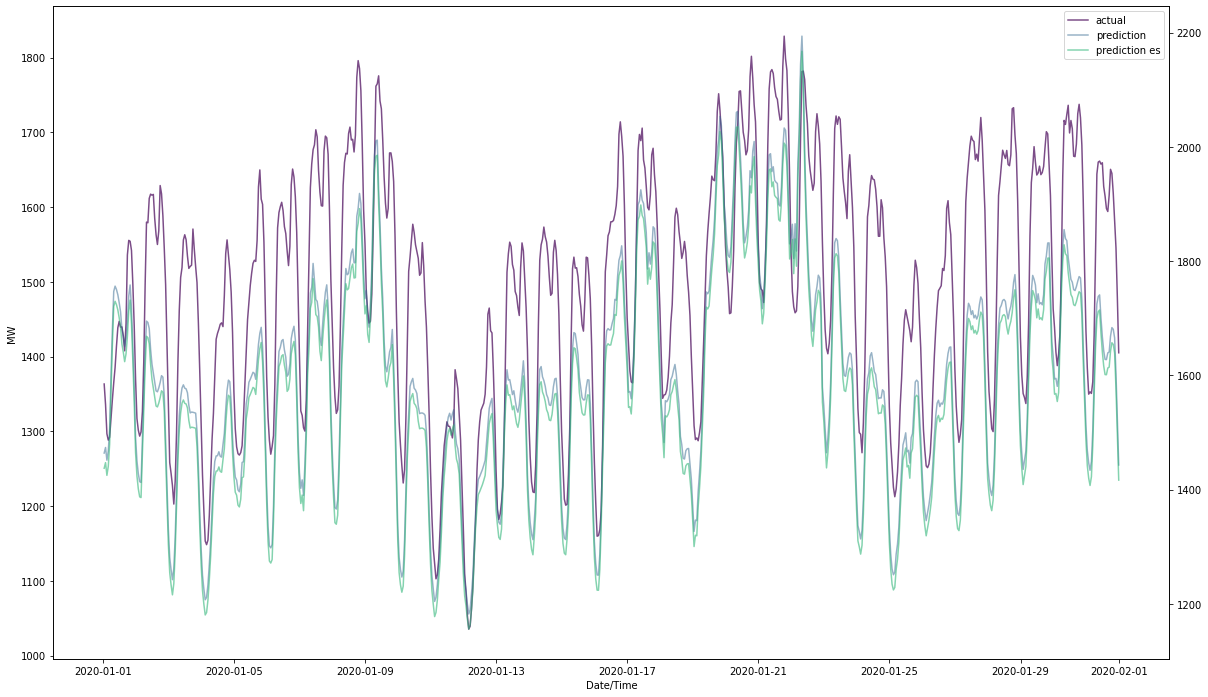

In [115]:
color1 = plt.cm.viridis(1)
color2 = plt.cm.viridis(0.33)
color3 = plt.cm.viridis(0.66)

fig, host = plt.subplots(figsize=(20,12))
par = host.twinx()

host.set_xlabel("Date/Time")
host.set_ylabel("MW")

p1, = host.plot(one_hot_test_df['date'], one_hot_test_df['mw'], color=color1, label="actual", alpha=0.7)
p2, = par.plot(one_hot_test_df['date'], predictions_test_scaled, color=color2, label="prediction", alpha=0.5)
p3, = par.plot(one_hot_test_df['date'], predictions_test_es_scaled, color=color3, label="prediction es", alpha=0.6)

lns = [p1, p2, p3]
host.legend(handles=lns, loc='best')

## Step 5
Build a seasonal ARIMA model on the residuals. A good model to start with would have two autoregressive terms: one seasonal difference (remember that seasons are 24 hours) and one seasonal moving average term. This model is also called an `ARIMA(2,0,0)(0,1,1)24` model.

In [117]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_resid_sarima = SARIMAX(one_hot_train_df['resid_inter2'], order=(2,0,0), seasonal_order=(0,1,1,24)).fit()
print(model_resid_sarima.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.42598D-01    |proj g|=  1.98791D+00

At iterate    5    f= -5.90215D-01    |proj g|=  8.01871D-01

At iterate   10    f= -6.64376D-01    |proj g|=  4.07548D-01

At iterate   15    f= -6.67859D-01    |proj g|=  8.06604D-03

At iterate   20    f= -6.68434D-01    |proj g|=  8.24062D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     30      1     0     0   1.343D-06  -6.685D-01
  F = -0.66845414908504375     

CONVERG

### Get the predicted values of your residuals on your training dataset from this model

In [118]:
preds_resid_sarima_train = model_resid_sarima.predict(start=0)
preds_resid_sarima_train

0        0.000000e+00
1        2.855602e-08
2        4.985912e-08
3        6.317742e-08
4        7.104335e-08
             ...     
25531   -2.999883e-01
25532   -2.771608e-01
25533   -2.282465e-01
25534   -1.971711e-01
25535   -1.881288e-01
Name: predicted_mean, Length: 25536, dtype: float64

### Add the predicted residuals to predictions of energy usage from linear regression to obtain the new dynamic model’s energy predictions

In [120]:
adjusted_resid_sarima_train_pred = model_inter2.predict(train_XN2) + preds_resid_sarima_train
adjusted_resid_sarima_train_pred.head()

0   -0.767131
1   -0.868455
2   -0.861896
3   -0.830740
4   -0.667936
dtype: float64

#### Calculate the training MAPE from sarima adjusted predictions

In [121]:
sarima_pred_Y = (adjusted_resid_sarima_train_pred * load_std_dev) + load_mean
sarima_pred_Y.head()

0    1340.273043
1    1311.224502
2    1313.105111
3    1322.037193
4    1368.711470
dtype: float64

In [125]:
error_percent = (one_hot_train_df['mw'] - sarima_pred_Y) / one_hot_train_df['mw']

mape_fraction = error_percent.apply(lambda x: abs(x)).sum() / error_percent.count()
mape = mape_fraction * 100

print(f'MAPE of adjusted sarima model on training set: {mape}')

MAPE of adjusted sarima model on training set: 1.3664767232209418


#### MAPE of adjusted sarima model is less than exponential smoothing adjusted model


In [123]:
# forecast of residuals for January 2020 using sarima adjusted model
sarima_test_residuals = model_resid_sarima.forecast(steps=744).reset_index(drop=True)
sarima_test_residuals.shape, sarima_test_residuals.head()

((744,),
 0   -0.143147
 1   -0.161421
 2   -0.155935
 3   -0.184435
 4   -0.235562
 Name: predicted_mean, dtype: float64)

### January 2020 predictions from sarima adjusted model

In [124]:
predictions_test_sarima =  test_predictions + sarima_test_residuals
predictions_test_sarima_scaled = (predictions_test_sarima * load_std_dev) + load_mean
predictions_test_sarima_scaled.head()

In [126]:
error_percent = (one_hot_test_df['mw'] - predictions_test_sarima_scaled) / one_hot_test_df['mw']

mape_fraction = error_percent.apply(lambda x: abs(x)).sum() / error_percent.count()
mape = mape_fraction * 100

print(f'MAPE of adjusted sarima model on test set: {mape}')

MAPE of adjusted sarima model on test set: 5.7867562321811485


### MAPE of adjusted sarima model test set is slightly higher than exp. smoothed model!

## Ensemble two residual forecasts to obtain a new residual forecast

A lot of times (but not always), ensembling multiple forecasts together can reduce error beyond what either model’s forecast could do alone.



In [128]:
### average of the residuals from es and sarima models
avg_resid_train = (preds_resid_sarima_train + one_hot_train_df['resid_es_pred']) / 2.0
avg_resid_train.head()

0    0.136100
1    0.138529
2    0.121346
3    0.095794
4    0.076512
dtype: float64

#### Add these new averaged predicted residuals to predictions of energy usage from your linear regression to obtain new dynamic model’s energy predictions


In [130]:
adjusted_resid_avg_train_pred = model_inter2.predict(train_XN2) + avg_resid_train
adjusted_resid_avg_train_pred.head()

0   -0.631032
1   -0.729926
2   -0.740550
3   -0.734945
4   -0.591424
dtype: float64

#### Calculate the training MAPE from ensembled predictions


In [131]:
avg_pred_Y = (adjusted_resid_avg_train_pred * load_std_dev) + load_mean
avg_pred_Y.head()

0    1379.291559
1    1350.939530
2    1347.893722
3    1349.500507
4    1390.646648
dtype: float64

In [133]:
error_percent = (one_hot_train_df['mw'] - avg_pred_Y) / one_hot_train_df['mw']

mape_fraction = error_percent.apply(lambda x: abs(x)).sum() / error_percent.count()
mape = mape_fraction * 100

print(f'MAPE of ensemble model on training set: {mape}')

MAPE of ensemble model on training set: 1.3765759249927216


#### MAPE of ensemble model is higher than of SARIMA model

### January 2020 ensemble predictions

In [137]:
avg_test_residuals = (test_residuals + sarima_test_residuals) / 2.0
adjusted_resid_avg_test_pred = test_predictions + avg_test_residuals
avg_pred_test_scaled = (adjusted_resid_avg_test_pred * load_std_dev) + load_mean
avg_pred_test_scaled.head()

0    1430.368369
1    1437.548334
2    1416.098487
3    1427.692057
4    1459.133094
dtype: float64

In [138]:
error_percent = (one_hot_test_df['mw'] - avg_pred_test_scaled) / one_hot_test_df['mw']

mape_fraction = error_percent.apply(lambda x: abs(x)).sum() / error_percent.count()
mape = mape_fraction * 100

print(f'MAPE of ensemble model on test set: {mape}')

MAPE of ensemble model on test set: 5.77373821819831


#### MAPE of ensemble model is slightly lower than SARIMA model (5.7867562321811485) and ES model (5.860557745107006) on test set